In [15]:
import os
import pandas as pd

def read_text_file(base_folder, timestamp, file_name):
    """
    Reads a text file from a specified timestamp folder using pandas.
    """
    folder_path = os.path.join(base_folder, timestamp)
    file_path = os.path.join(folder_path, file_name)
    
    if not os.path.exists(file_path):
        print(f"Error: The file '{file_name}' does not exist in the folder '{folder_path}'.")
        return None
    
    # Read the file, assuming tab-separated values
    df = pd.read_csv(file_path, sep=r"\s+", header=None, engine="python")

    # Assign column names
    df.columns = [f"Column_{i+1}" for i in range(df.shape[1])]

    # Remove the comma from Column_1
    df["Column_1"] = df["Column_1"].str.replace(",", "", regex=True)

    # Drop Column_2
    df = df.drop(columns=["Column_2"])

    df.rename(columns={
    "Column_1": "Span",
    "Column_3": "Co-ordinate",
    "Column_4": "TempAmp1StrainAmp1",
    "Column_5": "StrainAmp1",
    "Column_6": "FreqTemp",
    "Column_7": "FreqStrain",
    "Column_8": "TempCoef0",
    "Column_9": "TempCoef1",
    "Column_10": "Coef0",
    "Column_11": "CoefT",
    "Column_12": "CoefS",
    "Column_13": "RawSenStrainPos",
    "Column_14": "RawSenTempPos",
    "Column_15": "Cordinate For the Plot"
    }, inplace=True)

    return df

# Example usage
base_folder = '../0_GAB'  # change to a relative path
timestamp = '20141127120000'  # Change this to the desired timestamp folder
file = 'EI_N-B_Far_Comp.txt'  # Change this to your file name
df = read_text_file(base_folder, timestamp, file)

df.head()  # Display first few rows


,Span,Co-ordinate,TempAmp1StrainAmp1,StrainAmp1,FreqTemp,FreqStrain,TempCoef0,TempCoef1,Coef0,CoefT,CoefS,RawSenStrainPos,RawSenTempPos,Cordinate For the Plot
0,N13,12.64,16.63943,17.72692,10.84312,10.81907,-8919.184,821.8277,67732.54,-25806.1,19610.5,5457,5153,1312.64
1,N13,12.54,16.63943,17.86109,10.84312,10.81709,-8919.184,821.8277,67773.54,-25806.1,19610.5,5458,5153,1312.54
2,N13,12.44,16.63943,17.89359,10.84312,10.81557,-8919.184,821.8277,67805.54,-25806.1,19610.5,5459,5153,1312.44
3,N13,12.34,16.64037,17.81409,10.84323,10.81420,-8919.283,821.8277,67832.54,-25806.1,19610.5,5460,5152,1312.34
4,N13,12.24,16.63474,17.70338,10.84335,10.81277,-8919.184,821.8277,67858.54,-25806.1,19610.5,5461,5151,1312.24


C:\Users\gwd007\AppData\Local\Temp\ipykernel_21028\3306723827.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Co-ordinate"] = pd.to_numeric(df_filtered["Co-ordinate"], errors="coerce")
C:\Users\gwd007\AppData\Local\Temp\ipykernel_21028\3306723827.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["StrainAmp1"] = pd.to_numeric(df_filtered["StrainAmp1"], errors="coerce")


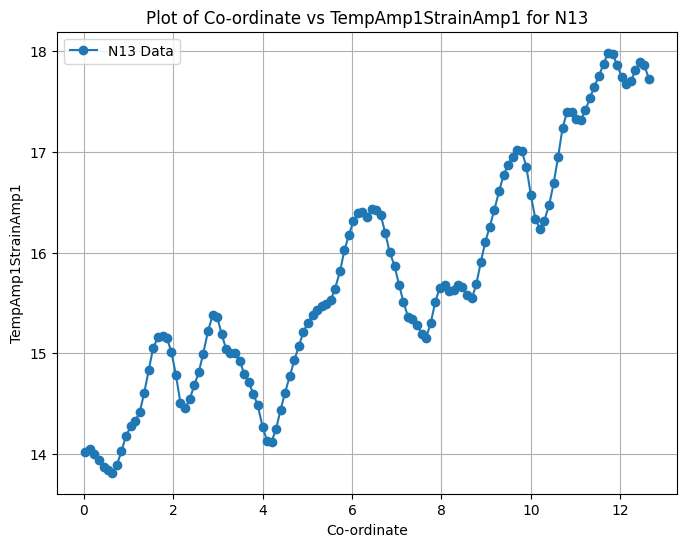

In [24]:
import matplotlib.pyplot as plt

if df is not None:
    # Filter only rows where Column_1 is 'N13'
    df_filtered = df[df["Span"] == "N13"]

    # Convert Column_3 & Column_4 to numeric
    df_filtered["Co-ordinate"] = pd.to_numeric(df_filtered["Co-ordinate"], errors="coerce")
    df_filtered["StrainAmp1"] = pd.to_numeric(df_filtered["StrainAmp1"], errors="coerce")

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(df_filtered["Co-ordinate"], df_filtered["StrainAmp1"], marker="o", linestyle="-", label="N13 Data")

    plt.xlabel("Co-ordinate")
    plt.ylabel("TempAmp1StrainAmp1")
    plt.title("Plot of Co-ordinate vs TempAmp1StrainAmp1 for N13")
    plt.legend()
    plt.grid(True)

    plt.show()